# NFT MCD

In [33]:
def deldub(x,y):
    data = {
    'column1': x,
    'column2': y
    }
    df = pd.DataFrame(data)
    df['group'] = (df['column1'] != df['column1'].shift()).cumsum()
    result = df.groupby(['column1', 'group'], as_index=False, sort=False)['column2'].mean()
    result = result.drop(columns='group')
    
    return result

#    test
x1 = ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'D', 'A', 'A']
y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 4, 7]
deldub(x1,y1)
print(deldub(x1,y1))

  column1  column2
0       A      1.5
1       B      4.0
2       C      6.5
3       D      8.5
4       A      5.5


In [48]:
#background for temperature series
def background(x):
    y = 0.1e-6 - 0.7e-6*x - 10e-7*x**2
    return y

#x = 3
#print(background(x))

-1.1e-05


['Test-32.csv']


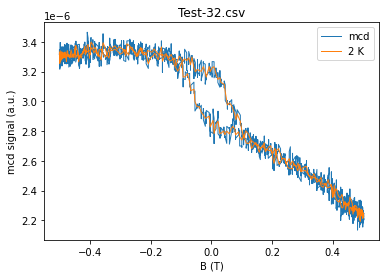

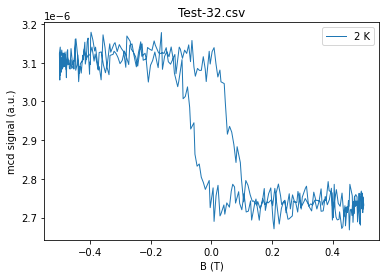

In [49]:
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import pandas as pd

mypath = 'C:/Users/g.sergey/python/mcd_data' #'D:/Projects/git/nft/data.mcd' 
os.chdir(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ipynb"]
print(files)

# Load the data into a pandas DataFrame
df = pd.read_csv('Test-32.csv')
#print(df.head(5))  



for file in files:
    frame = pd.read_csv(file, header=0, sep=',')
    #frame.plot(x='COM4.Field', y='GPIB0::4::INSTR.x', kind='line')
    x = frame['COM4.Field']
    y = frame['GPIB0::4::INSTR.x']
    #print(deldub(x,y))
    plt.plot(x, y, label='mcd', linewidth=1)
    plt.plot(deldub(x,y)['column1'], deldub(x,y)['column2'], label='2 K', linewidth=1)
    plt.title(file)
    plt.legend()
    plt.ylabel('mcd signal (a.u.)') 
    plt.xlabel('B (T)')
    plt.show()
    
    plt.plot(deldub(x,y)['column1'], deldub(x,y)['column2']-background(deldub(x,y)['column1']), label='2 K', linewidth=1)
    plt.title(file)
    plt.legend()
    plt.ylabel('mcd signal (a.u.)') 
    plt.xlabel('B (T)')
    plt.savefig(file, bbox_inches='tight', dpi = 200)
    plt.show()
    plt.close()
    
    output_file = file.split(".")[0] + '_new' + '.csv'
    save_path = mypath + '/processed/' + output_file #mypath + '/processed/' #r"D:\my_folder\output_file.csv"
    deldub(x,y).to_csv(save_path, index=False)